In [1]:
import numpy as np
import pandas as pd

In [2]:
Data_dir = 'Churn_Modelling.csv'

In [3]:
data = pd.read_csv(Data_dir)

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
import matplotlib.pyplot as plt


german = data[data.Geography=='Germany']
spain = data[data.Geography=='Spain']
france = data[data.Geography=='France']

people_countries = np.array([len(german[0:]) , len(spain[0:]),len(france[0:])])
people_countries

array([2509, 2477, 5014])

<BarContainer object of 3 artists>

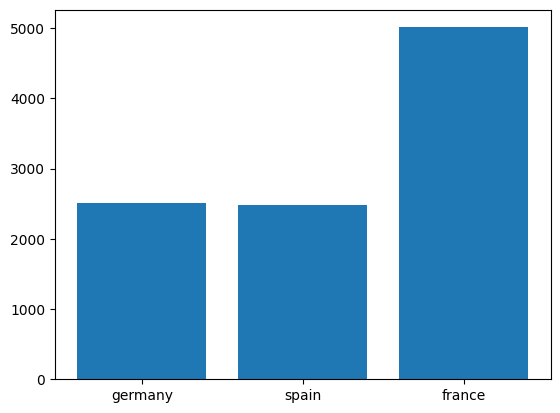

In [7]:
plt.bar(['germany' ,'spain' , 'france'] , people_countries)

In [8]:
import seaborn as sns

male = data[data.Gender =='Male']
female = data[data.Gender =='Female']
gender = np.array([len(male),len(female)])
gender

array([5457, 4543])

<Axes: >

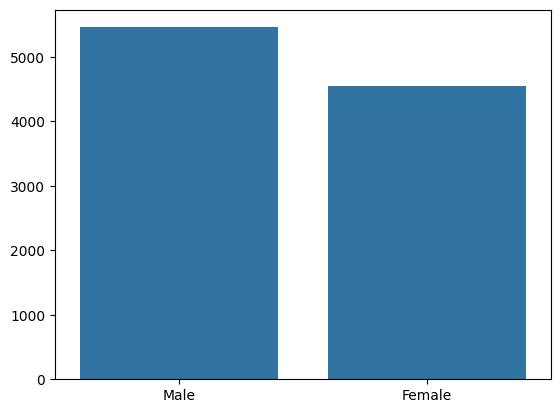

In [9]:
sns.barplot(x=(['Male','Female']) , y=gender)

In [10]:
X = data.drop(['RowNumber','CustomerId' , 'Exited' , 'Surname'] ,axis=1)
Y = data['Exited']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
X['Geography'] = le.fit_transform(X['Geography'])

X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [31]:

Exited_0 = data[(data['Exited']==0)] 
Exited_1 = data[(data['Exited']==1)]

<BarContainer object of 2 artists>

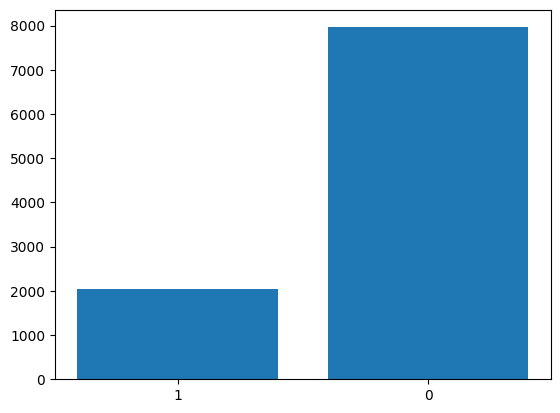

In [30]:
plt.bar( ['1','0'] , [len(Exited_1) ,len(Exited_0)])

In [33]:
from sklearn.utils import resample

unsample_1 = resample(Exited_1,replace =True ,n_samples = len(Exited_0),random_state= 42 )

<BarContainer object of 2 artists>

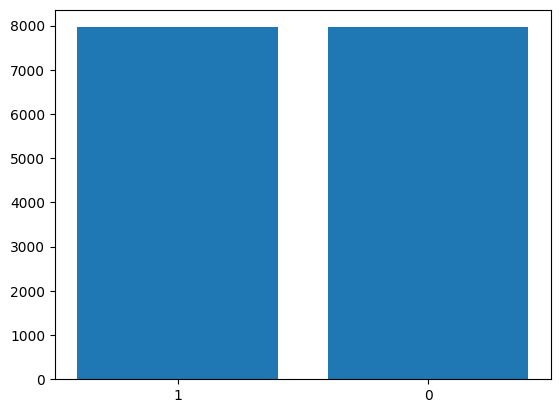

In [40]:
new_data = pd.concat([unsample_1 , Exited_0])

plt.bar(['1','0'] , [len(new_data[new_data['Exited']==1]) , len(new_data[new_data['Exited']==0])])

In [49]:
X = new_data.drop(['RowNumber','CustomerId' , 'Exited' , 'Surname'] ,axis=1)
Y = new_data['Exited']

le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
X['Geography'] = le.fit_transform(X['Geography'])

X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5363,771,2,1,51,5,135506.58,3,1,1,152479.64
7088,556,0,0,54,4,150005.38,1,1,0,157015.50
4076,672,0,0,50,1,0.00,1,1,0,12106.82
6255,547,1,1,55,4,111362.76,3,1,0,16922.28
5371,712,0,1,33,3,153819.58,1,1,0,79176.09
...,...,...,...,...,...,...,...,...,...,...
9993,644,0,1,28,7,155060.41,1,1,0,29179.52
9994,800,0,0,29,2,0.00,2,0,0,167773.55
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77


In [50]:
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import Regularizer

In [76]:
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y , test_size =0.2 ,random_state=42)
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size=0.2 ,random_state=42)

In [77]:
print(X_train.shape)

(10192, 10)


In [93]:
model = Sequential()
model.add(Dense(1024 , activation = 'relu'))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [94]:
model.compile(loss ='BinaryCrossentropy', optimizer = tf.keras.optimizers.Adam(0.0002) ,metrics ='accuracy')

In [95]:
history = model.fit(X_train ,Y_train , validation_data = [X_val,Y_val] ,epochs=20)

Epoch 1/20
319/319 [==============================] - 7s 16ms/step - loss: 32.0387 - accuracy: 0.5109 - val_loss: 11.3908 - val_accuracy: 0.4992
Epoch 2/20
319/319 [==============================] - 5s 15ms/step - loss: 13.3351 - accuracy: 0.5064 - val_loss: 13.1181 - val_accuracy: 0.4882
Epoch 3/20
319/319 [==============================] - 5s 15ms/step - loss: 8.4156 - accuracy: 0.5016 - val_loss: 1.8035 - val_accuracy: 0.5341
Epoch 4/20
319/319 [==============================] - 5s 15ms/step - loss: 5.0863 - accuracy: 0.5151 - val_loss: 6.4356 - val_accuracy: 0.4984
Epoch 5/20
319/319 [==============================] - 5s 15ms/step - loss: 4.0819 - accuracy: 0.5077 - val_loss: 4.7851 - val_accuracy: 0.5141
Epoch 6/20
319/319 [==============================] - 5s 15ms/step - loss: 2.9878 - accuracy: 0.5176 - val_loss: 1.7519 - val_accuracy: 0.4772
Epoch 7/20
319/319 [==============================] - 5s 15ms/step - loss: 1.8313 - accuracy: 0.5221 - val_loss: 1.2666 - val_accuracy: 0.

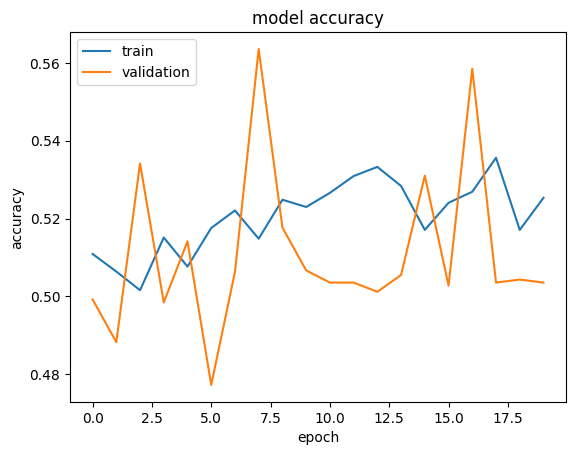

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


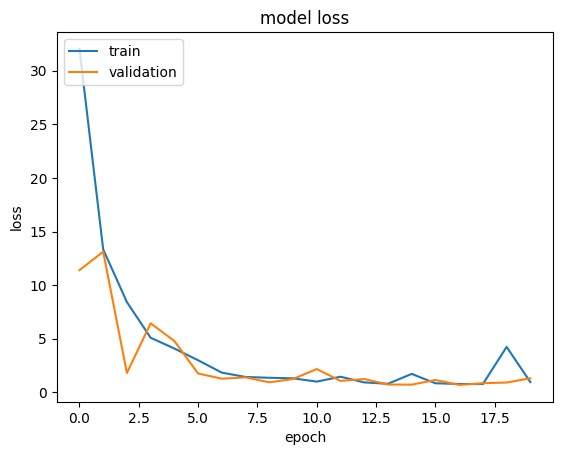

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [98]:
yhat = model.predict(X_test)
yhat = np.round(yhat)
yhat = yhat.reshape(3186)
yhat.shape

100/100 [==============================] - 1s 4ms/step


(3186,)

72